In [3]:
# в презентацию
# ссылка на репозиторий
# QR-код на репозиторий

In [4]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
page = 1
num_per_page = 100
area = 113
job=['Аналитик данных']
url = f'https://api.hh.ru/vacancies?text={job}&page={page}&per_page={num_per_page}&area={area}'

In [6]:
res = requests.get(url)

In [7]:
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [8]:
v = vacancies.get('items')

In [9]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [10]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [11]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [12]:
vnum  = vacancies.get('pages')

In [13]:
all_vacancy_ids= []
all_vacancy_items= []
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies?text={job}&page={i}&per_page={num_per_page}&area={area}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_items = res.json().get('items')
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)
    all_vacancy_items.extend(vacancy_items)

  0%|          | 0/20 [00:00<?, ?it/s]

In [14]:
# сохраним json в файл
with open('vacancy_items.json', 'w', encoding='utf-8') as f:
    json.dump(vacancy_items, f, ensure_ascii=False, indent=4)
with open('vacancies.json', 'w', encoding='utf-8') as f:
    json.dump(vacancies, f, ensure_ascii=False, indent=4)

In [15]:
# читаем json из файла
with open('vacancy_items.json', encoding='utf-8') as f:
    vacancy_items = json.load(f)
with open('vacancies.json', encoding='utf-8') as f:
    vacancies = json.load(f)

In [16]:
df = pd.DataFrame(all_vacancy_items)

In [17]:
df.shape

(2000, 29)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        2000 non-null   object
 1   premium                   2000 non-null   bool  
 2   name                      2000 non-null   object
 3   department                314 non-null    object
 4   has_test                  2000 non-null   bool  
 5   response_letter_required  2000 non-null   bool  
 6   area                      2000 non-null   object
 7   salary                    582 non-null    object
 8   type                      2000 non-null   object
 9   address                   1109 non-null   object
 10  response_url              0 non-null      object
 11  sort_point_distance       0 non-null      object
 12  published_at              2000 non-null   object
 13  created_at                2000 non-null   object
 14  archived                

In [19]:
df.head()

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,alternate_url,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary
0,70165043,False,Аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': 150000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Пресненская набе...",...,https://hh.ru/vacancy/70165043,[],"{'id': '5021275', 'name': 'НЬЮЭРАМЕДИА', 'url'...",{'requirement': 'Мыслить в цифрах. Успешный оп...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
1,69360960,False,Аналитик данных / Data Analyst (управленческая...,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': 300000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Большая Тульская...",...,https://hh.ru/vacancy/69360960,[],"{'id': '2464267', 'name': 'Carely', 'url': 'ht...",{'requirement': 'Структурированно описывать би...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
2,69982142,False,Аналитик по отчетности,None,False,False,"{'id': '88', 'name': 'Казань', 'url': 'https:/...","{'from': 100000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Казань', 'street': 'проспект Победы'...",...,https://hh.ru/vacancy/69982142,[],"{'id': '1191643', 'name': 'IDF Eurasia', 'url'...",{'requirement': 'Хорошее знание Excel (сводные...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
3,70167798,False,Аналитик данных,None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 60000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/70167798,[],"{'id': '9098729', 'name': 'BIZNESKRUCHE', 'url...",{'requirement': 'Базовые навыки программирован...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],True
4,70049715,False,Аналитик данных (SQL),None,False,False,"{'id': '53', 'name': 'Краснодар', 'url': 'http...","{'from': 65000, 'to': 70000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Краснодар', 'street': 'улица Красных...",...,https://hh.ru/vacancy/70049715,[],"{'id': '2813915', 'name': 'ПРОФИТКЛИКС', 'url'...",{'requirement': 'Умение работать с БД и SQL за...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False


In [20]:
# функция для извлечения поля name из объекта json
def get_name(cell):
    return cell['name']   

In [21]:
target_df = df[['id', 'name', 'area', 'salary','published_at','employer', 'schedule']]
target_df.shape

(2000, 7)

In [22]:
# получим дополнительныые поля
vak_url = 'https://api.hh.ru/vacancies/{}'

var = []
for i in tqdm(all_vacancy_ids):
    var.append(requests.get(vak_url.format(i)).json())

  0%|          | 0/2000 [00:00<?, ?it/s]

In [23]:
# сохраним json в файл
with open('var.json', 'w', encoding='utf-8') as f:
    json.dump(var, f, ensure_ascii=False, indent=4)

In [24]:
additional = pd.DataFrame(var) 

In [25]:
additional.shape

(2000, 47)

In [26]:
additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            2000 non-null   object
 1   premium                       2000 non-null   bool  
 2   billing_type                  2000 non-null   object
 3   relations                     2000 non-null   object
 4   name                          2000 non-null   object
 5   insider_interview             36 non-null     object
 6   response_letter_required      2000 non-null   bool  
 7   area                          2000 non-null   object
 8   salary                        583 non-null    object
 9   type                          2000 non-null   object
 10  address                       1109 non-null   object
 11  allow_messages                2000 non-null   bool  
 12  experience                    2000 non-null   object
 13  schedule          

In [27]:
target_df.head()

,id,name,area,salary,published_at,employer,schedule
0,70165043,Аналитик,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': 150000, 'currency': 'RU...",2022-09-22T15:15:54+0300,"{'id': '5021275', 'name': 'НЬЮЭРАМЕДИА', 'url'...","{'id': 'fullDay', 'name': 'Полный день'}"
1,69360960,Аналитик данных / Data Analyst (управленческая...,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,"{'id': '2464267', 'name': 'Carely', 'url': 'ht...","{'id': 'remote', 'name': 'Удаленная работа'}"
2,69982142,Аналитик по отчетности,"{'id': '88', 'name': 'Казань', 'url': 'https:/...","{'from': 100000, 'to': None, 'currency': 'RUR'...",2022-09-22T16:13:57+0300,"{'id': '1191643', 'name': 'IDF Eurasia', 'url'...","{'id': 'fullDay', 'name': 'Полный день'}"
3,70167798,Аналитик данных,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 60000, 'to': None, 'currency': 'RUR',...",2022-09-22T15:52:52+0300,"{'id': '9098729', 'name': 'BIZNESKRUCHE', 'url...","{'id': 'remote', 'name': 'Удаленная работа'}"
4,70049715,Аналитик данных (SQL),"{'id': '53', 'name': 'Краснодар', 'url': 'http...","{'from': 65000, 'to': 70000, 'currency': 'RUR'...",2022-09-23T17:30:52+0300,"{'id': '2813915', 'name': 'ПРОФИТКЛИКС', 'url'...","{'id': 'fullDay', 'name': 'Полный день'}"


In [28]:
# заполняем уровни опыта
target_df.loc[target_df['name'].str.contains('Senior'), 'level_exp'] = 'Senior'
target_df.loc[target_df['name'].str.contains('Junior'), 'level_exp'] = 'Junior'
target_df.loc[target_df['name'].str.contains('Младший'), 'level_exp'] = 'Junior'
target_df.loc[target_df['name'].str.contains('Ведущий'), 'level_exp'] = 'Middle'
target_df.loc[target_df['name'].str.contains('Middle'), 'level_exp'] = 'Middle'
target_df.loc[target_df['name'].str.contains('Chief'), 'level_exp'] = 'Head'
target_df.loc[target_df['name'].str.contains('Head'), 'level_exp'] = 'Head'


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [29]:
# преобразуем словари
target_df.loc[:,'area'] = target_df['area'].apply(get_name)
target_df.loc[:,'employer'] = target_df['employer'].apply(get_name)
target_df.loc[:,'schedule'] = target_df['schedule'].apply(get_name)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [30]:
target_df.head()

,id,name,area,salary,published_at,employer,schedule,level_exp
0,70165043,Аналитик,Москва,"{'from': 100000, 'to': 150000, 'currency': 'RU...",2022-09-22T15:15:54+0300,НЬЮЭРАМЕДИА,Полный день,NaN
1,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN
2,69982142,Аналитик по отчетности,Казань,"{'from': 100000, 'to': None, 'currency': 'RUR'...",2022-09-22T16:13:57+0300,IDF Eurasia,Полный день,NaN
3,70167798,Аналитик данных,Санкт-Петербург,"{'from': 60000, 'to': None, 'currency': 'RUR',...",2022-09-22T15:52:52+0300,BIZNESKRUCHE,Удаленная работа,NaN
4,70049715,Аналитик данных (SQL),Краснодар,"{'from': 65000, 'to': 70000, 'currency': 'RUR'...",2022-09-23T17:30:52+0300,ПРОФИТКЛИКС,Полный день,NaN


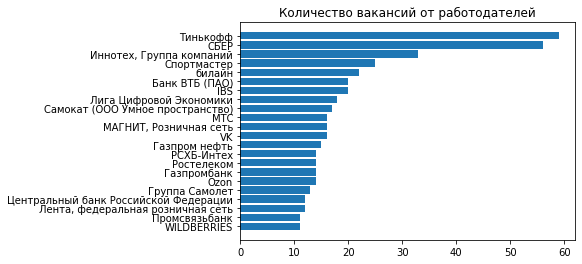

In [31]:
# выведем наибольший спрос от работодателей

#target_df.groupby('employer')['id'].count()
s = target_df.groupby('employer').size()
vac_by_empl = s[s.values>10].sort_values()
emp = vac_by_empl.index
val = vac_by_empl.values
plt.barh(emp,val)
plt.xlabel = 'Работодатели'
plt.ylabel = 'Вакансии'
plt.title('Количество вакансий от работодателей')
plt.show()

In [32]:
# попытка заполнить недостающие данные
add_info = additional[['id', 'experience','key_skills']]
add_info['exb_by_year'] = add_info['experience'].apply(get_name)
add_info.loc[:,'experience'] = add_info['experience'].apply(get_name)
#add_info.drop('experience', axis=1, inplace=True)

C:\Users\vg207\AppData\Local\Temp/ipykernel_1864/2894524284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_info['exb_by_year'] = add_info['experience'].apply(get_name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [33]:
emp_map = {'Нет опыта':'Junior', 'От 1 года до 3 лет':'Middle', 'От 3 до 6 лет':'Senior', 'Более 6 лет': 'Senior'}
add_info.loc[:,'exb_by_year'] = add_info['exb_by_year'].map(emp_map)

In [34]:
target_df_full = pd.merge(target_df, add_info, on='id', how='left')   

In [35]:
target_df_full.head()

,id,name,area,salary,published_at,employer,schedule,level_exp,experience,key_skills,exb_by_year
0,70165043,Аналитик,Москва,"{'from': 100000, 'to': 150000, 'currency': 'RU...",2022-09-22T15:15:54+0300,НЬЮЭРАМЕДИА,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Power BI'}, {'name...",Middle
1,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",Senior
2,69982142,Аналитик по отчетности,Казань,"{'from': 100000, 'to': None, 'currency': 'RUR'...",2022-09-22T16:13:57+0300,IDF Eurasia,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Работа с базами да...",Middle
3,70167798,Аналитик данных,Санкт-Петербург,"{'from': 60000, 'to': None, 'currency': 'RUR',...",2022-09-22T15:52:52+0300,BIZNESKRUCHE,Удаленная работа,NaN,От 1 года до 3 лет,"[{'name': 'Google Sheets'}, {'name': 'Power BI...",Middle
4,70049715,Аналитик данных (SQL),Краснодар,"{'from': 65000, 'to': 70000, 'currency': 'RUR'...",2022-09-23T17:30:52+0300,ПРОФИТКЛИКС,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Анализ данных'}, {...",Middle


In [36]:
target_df_full[['salary']].describe()

,salary
count,584
unique,263
top,"{'from': 80000, 'to': None, 'currency': 'RUR',..."
freq,26


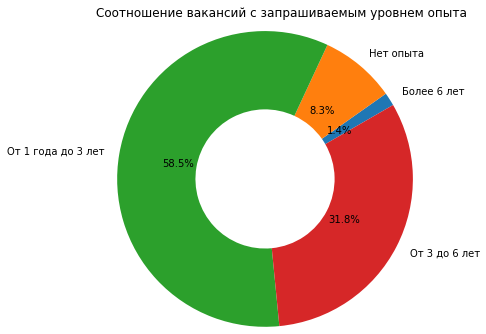

In [37]:
# соотношение вакансий с запрашиваемым уровнем опыта
exp = target_df_full.groupby('experience').size()
labels = exp.index
sizes = exp.values
fig, ax = plt.subplots()
wedge_properties = {"width":0.9}
ax.pie(sizes, labels=labels, autopct='%.1f%%', wedgeprops=wedge_properties, startangle=30, radius = 1.7)
fig.suptitle('Соотношение вакансий с запрашиваемым уровнем опыта', x=0.55, y=1.1)
plt.show()

In [38]:
def get_curr(cell):
    if cell is None:
        return 'RUR'
    else:
        return cell['currency']

In [39]:
def get_salary(cell):
    EUR = 56.48
    USD = 58.1
    if cell is None:
        return None
    else:
        from_sal = cell['from']
        to_sal = cell['to']
        if to_sal is None:
            if get_curr(cell) == 'RUR':
                salary = from_sal
            elif get_curr(cell) == 'EUR':
                salary = from_sal*EUR
            elif get_curr(cell) == 'USD':
                salary = from_sal*USD
        else:
            salary = to_sal
            if get_curr(cell) == 'RUR':
                salary = to_sal
            elif get_curr(cell) == 'EUR':
                salary = to_sal*EUR
            elif get_curr(cell) == 'USD':
                salary = to_sal*USD
            
        return salary

def get_salary_from(cell):
    EUR = 56.48
    USD = 58.1
    if cell is None:
        return None
    else:
        from_sal = cell['from']
        to_sal = cell['to']
        if from_sal is None:
            salary=0
        else:
            if get_curr(cell) == 'RUR':
                salary = from_sal
            elif get_curr(cell) == 'EUR':
                salary = from_sal*EUR
            elif get_curr(cell) == 'USD':
                salary = from_sal*USD
    return salary
    
    
    

In [40]:
d = {'from': 10 , 'to': None, 'currency': 'EUR'}
get_salary(d)
#get_salary_from(d)

564.8

In [41]:
salary_by_city = target_df_full[['area','salary']]

In [42]:
salary_is_null = salary_by_city[['salary']].isnull().sum()
print(salary_is_null)
d = salary_by_city['area'].count()
n = salary_by_city['salary'].count()

salary    1420
dtype: int64


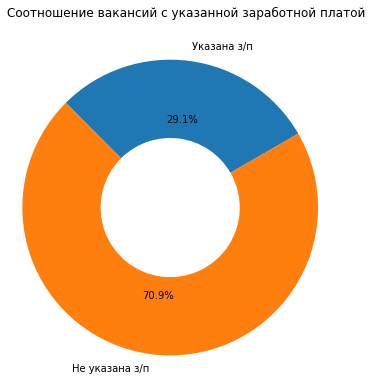

In [43]:
labels = ['Указана з/п','Не указана з/п']
sizes = [n, d-n]
fig, ax = plt.subplots()
wedge_properties = {"width":0.9}
ax.pie(sizes, labels=labels, autopct='%.1f%%', wedgeprops=wedge_properties, startangle=30, radius = 1.7)
fig.suptitle('Соотношение вакансий с указанной заработной платой', x=0.55, y=1.2)
plt.show()

In [44]:
target_df_full.loc[:,'salary_from'] = target_df_full['salary'].apply(get_salary_from)
target_df_full.loc[:,'salary_to'] = target_df_full['salary'].apply(get_salary)
target_df_full.loc[:,'currency'] = target_df_full['salary'].apply(get_curr)

In [45]:
eur = 56.48
usd = 58.1

In [46]:
target_df_full['currency'].unique()

array(['RUR', 'USD', 'EUR'], dtype=object)

In [47]:
#target_df_full.drop('salary', inplace=True, axis = 1)

In [48]:
target_df_full.head(15)

,id,name,area,salary,published_at,employer,schedule,level_exp,experience,key_skills,exb_by_year,salary_from,salary_to,currency
0,70165043,Аналитик,Москва,"{'from': 100000, 'to': 150000, 'currency': 'RU...",2022-09-22T15:15:54+0300,НЬЮЭРАМЕДИА,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Power BI'}, {'name...",Middle,100000.0,150000.0,RUR
1,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",Senior,150000.0,300000.0,RUR
2,69982142,Аналитик по отчетности,Казань,"{'from': 100000, 'to': None, 'currency': 'RUR'...",2022-09-22T16:13:57+0300,IDF Eurasia,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Работа с базами да...",Middle,100000.0,100000.0,RUR
3,70167798,Аналитик данных,Санкт-Петербург,"{'from': 60000, 'to': None, 'currency': 'RUR',...",2022-09-22T15:52:52+0300,BIZNESKRUCHE,Удаленная работа,NaN,От 1 года до 3 лет,"[{'name': 'Google Sheets'}, {'name': 'Power BI...",Middle,60000.0,60000.0,RUR
4,70049715,Аналитик данных (SQL),Краснодар,"{'from': 65000, 'to': 70000, 'currency': 'RUR'...",2022-09-23T17:30:52+0300,ПРОФИТКЛИКС,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Анализ данных'}, {...",Middle,65000.0,70000.0,RUR
5,69755863,Аналитик данных,Москва,"{'from': 200000, 'to': None, 'currency': 'RUR'...",2022-09-23T13:55:28+0300,MedPoint24,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'Финансовый анализ'}, {'name': 'MS P...",Middle,200000.0,200000.0,RUR
6,69647954,Аналитик данных / Data Analyst,Москва,"{'from': 60000, 'to': 90000, 'currency': 'RUR'...",2022-09-24T09:47:19+0300,Оптимакрос,Удаленная работа,NaN,От 1 года до 3 лет,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",Middle,60000.0,90000.0,RUR
7,69665613,Аналитик (EXCEL),Москва,"{'from': None, 'to': 100000, 'currency': 'RUR'...",2022-09-24T15:11:16+0300,оператор связи WhyFly,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'Подготовка презентаций'}, {'name': ...",Middle,0.0,100000.0,RUR
8,69700212,Аналитик BI,Москва,"{'from': 240000, 'to': None, 'currency': 'RUR'...",2022-09-24T10:17:36+0300,Платформа Больших Данных,Полный день,NaN,От 3 до 6 лет,"[{'name': 'Статистический анализ'}, {'name': '...",Senior,240000.0,240000.0,RUR
9,67711496,Аналитик SQL,Москва,"{'from': 150000, 'to': 200000, 'currency': 'RU...",2022-09-23T16:58:40+0300,WILDBERRIES,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'MS SQL'}, {'name': 'Бизнес-анализ'}...",Middle,150000.0,200000.0,RUR


In [49]:
# круговая диаграмма с соотношением вакансий с зарплатами и без зарплаты
#target_df_full[~target_df_full[['salary_from']].isnull()]
target_df_full[['salary_from','salary_to']].describe()
#target_df_full[(target_df_full['salary_from']==0) and (target_df_full['salary_to']==0)]

,salary_from,salary_to
count,584.000000,584.000000
mean,74578.441781,114571.301370
std,59515.591605,74243.451354
min,0.000000,230.000000
25%,40000.000000,60000.000000
50%,70000.000000,90000.000000
75%,100000.000000,150000.000000
max,350000.000000,500000.000000


In [50]:
target_df_full.isna().mean()

id              0.000000
name            0.000000
area            0.000000
salary          0.708583
published_at    0.000000
employer        0.000000
schedule        0.000000
level_exp       0.891218
experience      0.000000
key_skills      0.000000
exb_by_year     0.000000
salary_from     0.708583
salary_to       0.708583
currency        0.000000
dtype: float64

In [51]:
#sk = [{'name': 'Статистический анализ'}, {'name': 'fsdfd'}]

In [52]:

def get_skills(cell):
    d = []
    for el in cell:
#        print(el)
#        print(el['name'])
        d.append(el['name'])
    return d
        #d.append(cell.name[])

In [53]:
#target_df_full['skills'] = 
target_df_full['skills'] = target_df_full['key_skills'].apply(get_skills)

In [54]:
target_df_full.head()

,id,name,area,salary,published_at,employer,schedule,level_exp,experience,key_skills,exb_by_year,salary_from,salary_to,currency,skills
0,70165043,Аналитик,Москва,"{'from': 100000, 'to': 150000, 'currency': 'RU...",2022-09-22T15:15:54+0300,НЬЮЭРАМЕДИА,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Power BI'}, {'name...",Middle,100000.0,150000.0,RUR,"[SQL, Power BI, Python, PostgreSQL, Анализ дан..."
1,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",Senior,150000.0,300000.0,RUR,"[SQL, Python, Tableau, Data Analysis, Power BI..."
2,69982142,Аналитик по отчетности,Казань,"{'from': 100000, 'to': None, 'currency': 'RUR'...",2022-09-22T16:13:57+0300,IDF Eurasia,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Работа с базами да...",Middle,100000.0,100000.0,RUR,"[SQL, Работа с базами данных, Управленческая о..."
3,70167798,Аналитик данных,Санкт-Петербург,"{'from': 60000, 'to': None, 'currency': 'RUR',...",2022-09-22T15:52:52+0300,BIZNESKRUCHE,Удаленная работа,NaN,От 1 года до 3 лет,"[{'name': 'Google Sheets'}, {'name': 'Power BI...",Middle,60000.0,60000.0,RUR,"[Google Sheets, Power BI, SQL, Разработка инст..."
4,70049715,Аналитик данных (SQL),Краснодар,"{'from': 65000, 'to': 70000, 'currency': 'RUR'...",2022-09-23T17:30:52+0300,ПРОФИТКЛИКС,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Анализ данных'}, {...",Middle,65000.0,70000.0,RUR,"[SQL, Анализ данных, Ведение отчетности]"


In [55]:
# Круговая диаграмма - подготовка данных
pie = target_df_full.groupby('schedule')['id'].count()
#pie.first()
pie

schedule
Гибкий график         64
Полный день         1556
Сменный график         6
Удаленная работа     378
Name: id, dtype: int64

In [56]:
pie.index

Index(['Гибкий график', 'Полный день', 'Сменный график', 'Удаленная работа'], dtype='object', name='schedule')

<AxesSubplot:xlabel='schedule'>

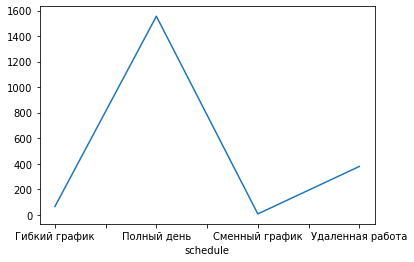

In [57]:
pie.plot()

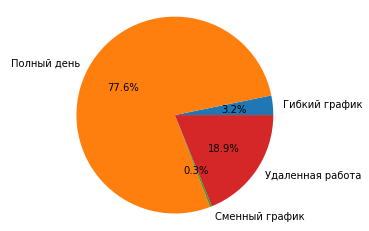

In [58]:
# Круговая диаграмма
labels = pie.index
fig1, ax1 = plt.subplots()
ax1.pie(pie, labels=labels, autopct='%1.1f%%') # №, explode = explode)
ax1.axis('equal')  
plt.show()

#вывести заголовок


In [59]:
# получим список скилов для облака тегов
lst = sum(target_df_full['skills'], [])

# посмотрим, сколько навыков набралось всего (неуникальных)
#list_skills = target_df_full.skills

In [60]:
!pip install wordcloud

In [61]:
from wordcloud import WordCloud

In [62]:
# преобразуем словарь в текст
s = ' '.join(lst)
#''.join('{}{}'.format(key, val) for key, val in lst.items())

In [63]:
!pip install corpus

In [64]:
#from nltk.corpus import stopwords
# сохраняем список с русскими стоп-cловами в переменную stop_words
#stop_words = stopwords.words('russian')

In [65]:
stop_words = open('stop-ru.txt', 'r', encoding='utf8')
stop_words = stop_words.read()
stop_words = stop_words.split('\n')

In [66]:
clear_data=[]
for i in lst:
    if(i not in stop_words):
        clear_data.append(i)

In [67]:
len(clear_data)

12108

In [68]:
big_string=''
for i in range(len(clear_data)):
    big_string+=(clear_data[i]+' ')

(-0.5, 599.5, 299.5, -0.5)

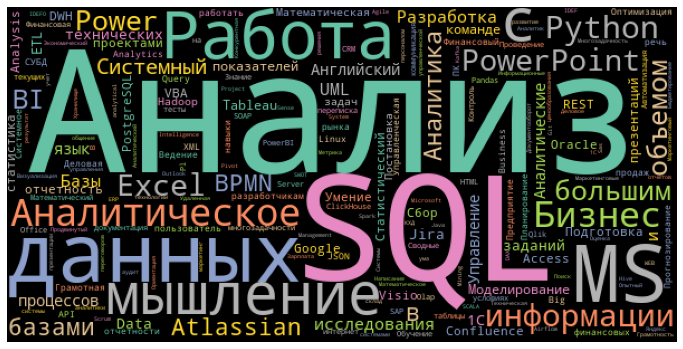

In [69]:
# Генерируем облако слов и сохраняем в переменной cloud
# cloud = WordCloud(max_words=30).generate(big_string)
cloud = WordCloud(width = 600, height = 300, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(big_string)
# Выводим облако слов на экран
#plt.imshow(cloud)
plt.figure(figsize=(12,12))
plt.imshow(cloud)
#plt.axis('off')
# Отключаем отображение осей
plt.axis('off')

In [70]:
import seaborn as sns

In [71]:
emp_map = {'Нет опыта':'Junior', 'От 1 года до 3 лет':'Middle', 'От 3 до 6 лет':'Senior', 'Более 6 лет': 'Senior'}
add_info.loc[:,'exb_by_year'] = add_info['exb_by_year'].map(emp_map)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [72]:
s = target_df_full.groupby('area').size()
vac_by_cities = s[s.values>10]

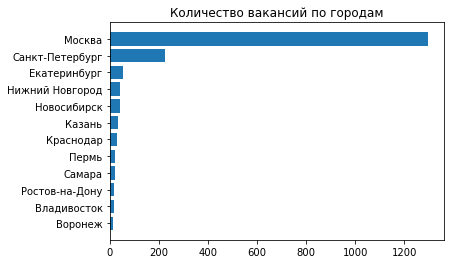

In [94]:
s = target_df_full.groupby('area').size()
vac_by_empl = s[s.values>10].sort_values()
emp = vac_by_empl.index
val = vac_by_empl.values
plt.barh(emp,val)
plt.title('Количество вакансий по городам')
plt.show()

In [95]:
#vac_by_cities.plot(x='index', y='values', kind='barh', fontsize=14, figsize=(5,5))

# столбиковая диаграмма
# подписать 
# отсортировать!
# заголовок
# название осей


In [121]:
sal = target_df_full[~target_df_full['salary'].isnull()]
#sal_sorted = sal['salary_to'].sort_values(ascending=False)
#sal_sorted.head()

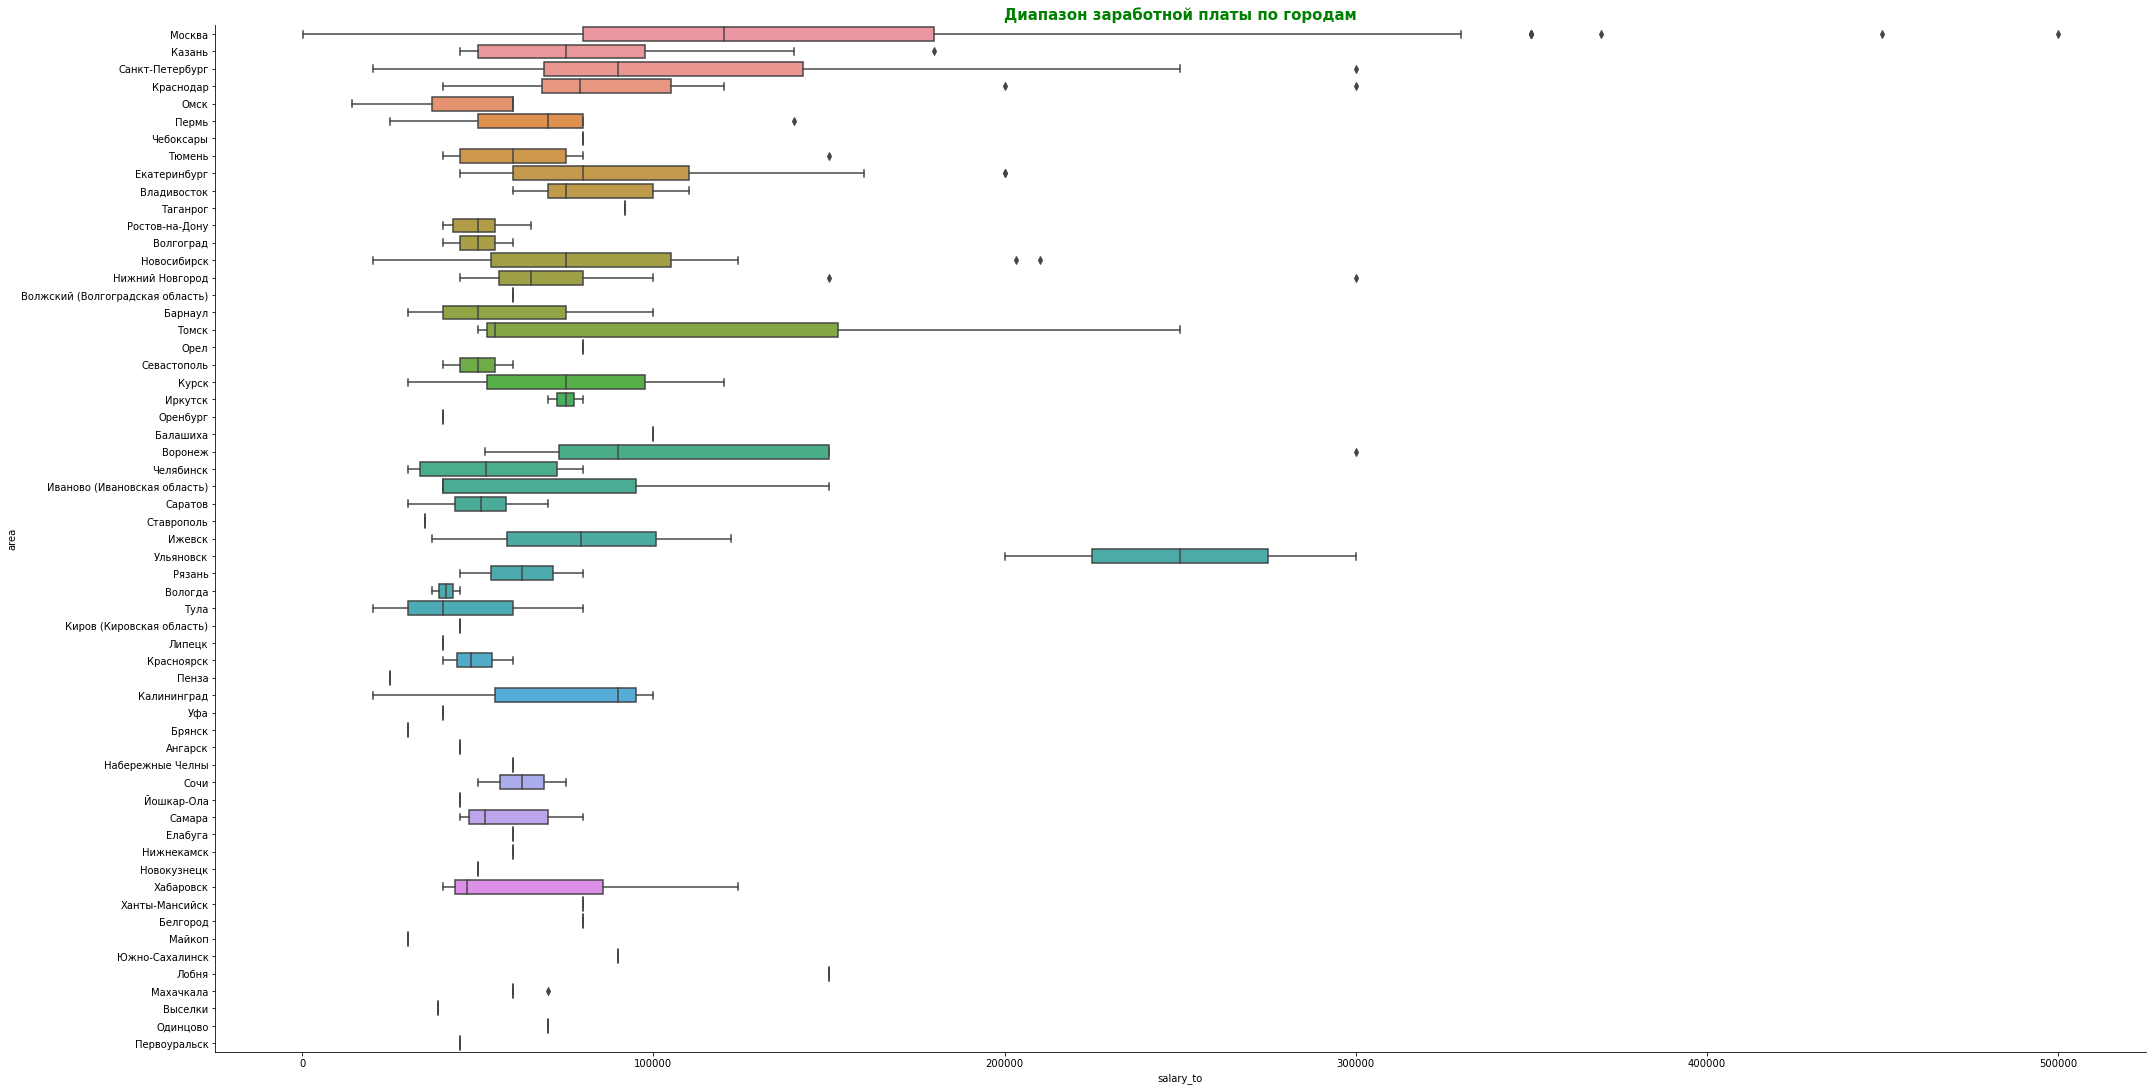

In [122]:
sns.catplot(
    y='area', 
    x='salary_to', 
    data=sal, 
    kind='box', 
    #hue='Promotion',
    height=15, 
    aspect=2);
plt.title('Диапазон заработной платы по городам',
          size=15, 
          color='g', 
          weight='bold');

In [132]:
# Предсказание заработной платы линейной регрессией
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [115]:
# Определим количество пустых значений
target_df_full.isna().sum()

id                 0
name               0
area               0
salary          1420
published_at       0
employer           0
schedule           0
level_exp       1786
experience         0
key_skills         0
exb_by_year        0
salary_from     1420
salary_to       1420
currency           0
skills             0
dtype: int64

In [155]:
le = preprocessing.LabelEncoder()

target_df_full['area_dig'] = le.fit_transform(target_df_full['area'])
target_df_full['sched_dig'] = le.fit_transform(target_df_full['schedule'])
target_df_full['exp_dig'] = le.fit_transform(target_df_full['experience'])
target_df_full['empl_dig'] = le.fit_transform(target_df_full['employer'])

#target_df_full['skills_dig'] = le.fit_transform(target_df_full['skills'])

target_df_full.head(3)

,id,name,area,salary,published_at,employer,schedule,level_exp,experience,key_skills,exb_by_year,salary_from,salary_to,currency,skills,area_dig,sched_dig,exp_dig,empl_dig
0,70165043,Аналитик,Москва,"{'from': 100000, 'to': 150000, 'currency': 'RU...",2022-09-22T15:15:54+0300,НЬЮЭРАМЕДИА,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Power BI'}, {'name...",Middle,100000.0,150000.0,RUR,"[SQL, Power BI, Python, PostgreSQL, Анализ дан...",33,1,2,681
1,69360960,Аналитик данных / Data Analyst (управленческая...,Москва,"{'from': 150000, 'to': 300000, 'currency': 'RU...",2022-09-25T08:27:37+0300,Carely,Удаленная работа,NaN,От 3 до 6 лет,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",Senior,150000.0,300000.0,RUR,"[SQL, Python, Tableau, Data Analysis, Power BI...",33,3,3,51
2,69982142,Аналитик по отчетности,Казань,"{'from': 100000, 'to': None, 'currency': 'RUR'...",2022-09-22T16:13:57+0300,IDF Eurasia,Полный день,NaN,От 1 года до 3 лет,"[{'name': 'SQL'}, {'name': 'Работа с базами да...",Middle,100000.0,100000.0,RUR,"[SQL, Работа с базами данных, Управленческая о...",21,1,2,132


In [158]:
sal_feat = target_df_full[~target_df_full['salary_to'].isna()][['salary_to','area_dig', 'exp_dig', 'sched_dig','empl_dig']]
sal_feat.head()

,salary_to,area_dig,exp_dig,sched_dig,empl_dig
0,150000.0,33,2,1,681
1,300000.0,33,3,3,51
2,100000.0,21,2,1,132
3,60000.0,53,2,3,36
4,70000.0,25,2,1,717


In [159]:
X = sal_feat.drop('salary_to', axis = 1)
y = sal_feat['salary_to']

In [160]:
# разобьем датасет
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    shuffle=True, 
                                                    random_state=16)

print(X_train.shape,X_test.shape)

(408, 4) (176, 4)


In [161]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [162]:
predict = model.predict(X_test)

In [163]:
X_test_copy = X_test.copy()

sal_with_predict = X_test_copy
sal_with_predict['real_salary'] = y_test
sal_with_predict['predict_salary'] = predict

sal_with_predict[['real_salary','predict_salary']].head(10)

,real_salary,predict_salary
14,120000.0,108555.984938
1904,100000.0,145774.995692
1385,170000.0,66692.057124
383,140000.0,117842.529457
13,100000.0,89921.300953
630,50000.0,60351.588797
942,45000.0,136487.830108
616,45000.0,62303.740309
332,120000.0,180364.035408
1016,60000.0,120893.107206
